# **Student Application Prediction using Logistic Regression with Gradient Descent and Naive Bayes**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
sns.set_style('darkgrid')

### Load Data

In [ ]:
names = ['test_1_score', 'test_2_score', 'is_accepted']

df = pd.read_csv('https://raw.githubusercontent.com/dzniel/datasets/main/Mark.txt', header=None, sep=',', names=names)
df.shape

(100, 3)

### Data Exploration

In [ ]:
df.head()

,test_1_score,test_2_score,is_accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df.tail()

,test_1_score,test_2_score,is_accepted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   test_1_score  100 non-null    float64
 1   test_2_score  100 non-null    float64
 2   is_accepted   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
test_1_score,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
test_2_score,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
is_accepted,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

test_1_score    0
test_2_score    0
is_accepted     0
dtype: int64

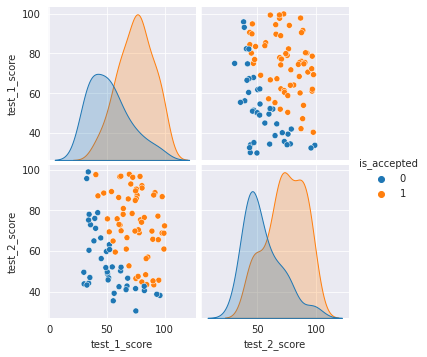

In [ ]:
sns.pairplot(data=df, hue='is_accepted')
plt.show()

### Data Preprocessing

Splitting Data

In [ ]:
X = df.drop('is_accepted', axis=1)
y = df['is_accepted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (75, 2)
X_test shape: (25, 2)
y_train shape: (75,)
y_test shape: (25,)


Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled[:10]

array([[-0.64174232,  1.18263045],
       [ 0.92071881, -0.50800531],
       [-1.2529881 ,  1.07453543],
       [ 0.94840786, -1.16447163],
       [ 0.31748344,  1.54338804],
       [ 0.45671343, -1.82892764],
       [ 1.64471223,  1.055212  ],
       [ 0.11504744,  0.9969627 ],
       [-0.23148264, -0.81900348],
       [ 0.42951822,  0.9584642 ]])

In [ ]:
X_test_scaled[:10]

array([[-0.32979014, -0.44652279],
       [-1.47439294, -0.38853946],
       [-1.56518239, -1.51191705],
       [-0.07864032, -0.93647399],
       [-0.64176178, -1.34655569],
       [-1.49157009,  0.58707678],
       [-0.66761079, -1.14717047],
       [ 1.26637101,  0.22987061],
       [ 1.61647412, -1.84598167],
       [-1.46939684,  0.77028184]])

### Modeling

**Logistic Regression with Gradient Descent**

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(X, weight, bias):
  preds = np.dot(X, weight) + bias
  theta = sigmoid(preds)
  y_pred = [1 if i >= 0.5 else 0 for i in theta]
  return y_pred

def cost_function(y, y_pred):
  m = len(y)
  return -1 * (np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred)) / m)

def derivative_weight(X, y, y_pred):
  m = len(y)
  return (1/m) * np.dot(X.T, y_pred - y)

def derivative_bias(y, y_pred):
  m = len(y)
  return (1/m) * np.sum(y_pred - y)

def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
  weight = np.random.randn(X.shape[1])
  bias = 0
  error = []
  for _ in range(epochs):
    preds = np.dot(X, weight) + bias
    y_pred = sigmoid(preds)
    weight = weight - learning_rate * derivative_weight(X, y, y_pred)
    bias = bias - learning_rate * derivative_bias(y, y_pred)
    error.append(cost_function(y, y_pred))
  sns.lineplot(x=np.arange(1, epochs), y=error[1:])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Error/Loss')
  plt.show()
  return weight, bias

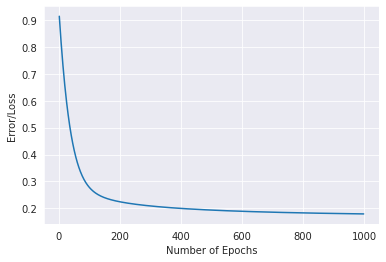

Weights: [3.38999654 3.00443537]
Bias: 1.1533719172825145


In [ ]:
weight, bias = gradient_descent(X_train_scaled, y_train)
print(f'Weights: {weight}')
print(f'Bias: {bias}')

**Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

### Model Prediction

**Logistic Regression with Gradient Descent**

In [ ]:
y_pred = predict(X_test_scaled, weight, bias)

In [ ]:
result_df = pd.DataFrame({
    'test_1_score': X_test.iloc[:, 0],
    'test_2_score': X_test.iloc[:, 1],
    'is_accepted': y_pred
})

result_df

,test_1_score,test_2_score,is_accepted
83,57.238706,59.514282,0
53,34.524514,60.396342,0
70,32.722833,43.307173,0
45,62.222676,52.060992,0
44,51.047752,45.822701,0
39,34.183640,75.237720,0
22,50.534788,48.855812,0
80,88.913896,69.803789,1
10,95.861555,38.225278,1
0,34.623660,78.024693,0


**Naive Bayes**

In [ ]:
nb_y_pred = model.predict(X_test_scaled)

In [ ]:
nb_result_df = pd.DataFrame({
    'test_1_score': X_test.iloc[:, 0],
    'test_2_score': X_test.iloc[:, 1],
    'is_accepted': nb_y_pred
})

nb_result_df

,test_1_score,test_2_score,is_accepted
83,57.238706,59.514282,0
53,34.524514,60.396342,0
70,32.722833,43.307173,0
45,62.222676,52.060992,0
44,51.047752,45.822701,0
39,34.183640,75.237720,0
22,50.534788,48.855812,0
80,88.913896,69.803789,1
10,95.861555,38.225278,1
0,34.623660,78.024693,0


### Evaluation

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(3, 3))
  fig.suptitle('Confusion Matrix')
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot=True,
                   linewidths=0.5,
                   cbar=False,
                   cmap='Spectral')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

**Logistic Regression with Gradient Descent**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.93      0.81      0.87        16

    accuracy                           0.84        25
   macro avg       0.83      0.85      0.83        25
weighted avg       0.86      0.84      0.84        25



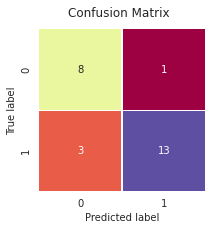

In [ ]:
plot_confusion_matrix(y_test, y_pred)

**Naive Bayes**

In [ ]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.93      0.88      0.90        16

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



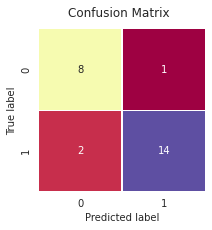

In [ ]:
plot_confusion_matrix(y_test, nb_y_pred)